# Corportate Bond Spreads Exploratory Notebook

## Importing dependencies

In [64]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy

In [3]:
# File path and loading data

# File paths
AAA = 'Corp_Bond_AAA.csv'
BBB = 'Corp_Bond_BBB.csv'
B = 'Corp_Bond_B.csv'

# Bond Data 
Corp_Bond_AAA_df= pd.read_csv(AAA)
Corp_Bond_BBB_df= pd.read_csv(BBB)
Corp_Bond_B_df= pd.read_csv(B)

combined_AAA_BBB = pd.merge(Corp_Bond_AAA_df,Corp_Bond_BBB_df, on='DATE')
combined_AAA_BBB

# Merging the Corporate B bond data
combined_AAA_BBB_B = pd.merge(combined_AAA_BBB,Corp_Bond_B_df, on='DATE')
combined_AAA_BBB_B

,DATE,BAMLC0A1CAAAEY,BAMLC0A4CBBBEY,BAMLH0A2HYBEY
0,3/19/2020,3.10,5.23,11.51
1,3/18/2020,2.96,4.82,10.86
2,3/17/2020,2.58,4.27,9.98
3,3/16/2020,2.28,3.86,9.76
4,3/13/2020,2.39,3.77,8.72
...,...,...,...,...
6054,1/7/1997,6.82,7.39,10.07
6055,1/6/1997,6.80,7.37,10.05
6056,1/3/1997,6.80,7.34,10.01
6057,1/2/1997,6.80,7.36,10.00


In [4]:
# Renaming the columns
combined_AAA_BBB_B.columns = ['Date','AAA Rating','BBB Rating', 'B Rating'] 

In [5]:
# Sorting by date 
combined_AAA_BBB_B = combined_AAA_BBB_B.sort_index(axis=0, ascending=False)
combined_AAA_BBB_B

# Converting the dates 
combined_AAA_BBB_B['Date'] = pd.to_datetime(combined_AAA_BBB_B['Date'])
combined_AAA_BBB_B

,Date,AAA Rating,BBB Rating,B Rating
6058,1996-12-31,6.72,7.26,10.01
6057,1997-01-02,6.80,7.36,10.00
6056,1997-01-03,6.80,7.34,10.01
6055,1997-01-06,6.80,7.37,10.05
6054,1997-01-07,6.82,7.39,10.07
...,...,...,...,...
4,2020-03-13,2.39,3.77,8.72
3,2020-03-16,2.28,3.86,9.76
2,2020-03-17,2.58,4.27,9.98
1,2020-03-18,2.96,4.82,10.86


In [6]:
# Bridging Treasury Data
treasury_yields = 'US_Yield_Curve.csv'

treasury_yield_df =pd.read_csv(treasury_yields)
# Ordering the dates

treasury_yield_df = treasury_yield_df.sort_index(axis=0, ascending=False)

#Getting the dates
treasury_yield_df['Date'] = pd.to_datetime(treasury_yield_df['Date'])
treasury_yield_df

# Keeping the same date range as above
dated_treasury_yield_df = treasury_yield_df.loc[(treasury_yield_df['Date']>="1997-01-02")]

dated_treasury_yield_df

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
5807,1997-01-02,NaN,NaN,5.19,5.35,5.63,5.97,6.13,6.30,6.45,6.54,6.85,6.75
5806,1997-01-03,NaN,NaN,5.17,5.34,5.60,5.95,6.11,6.28,6.42,6.52,6.84,6.74
5805,1997-01-06,NaN,NaN,5.17,5.31,5.61,5.97,6.12,6.30,6.44,6.54,6.86,6.77
5804,1997-01-07,NaN,NaN,5.16,5.30,5.61,5.98,6.14,6.32,6.47,6.57,6.89,6.80
5803,1997-01-08,NaN,NaN,5.16,5.30,5.61,6.01,6.17,6.34,6.49,6.60,6.92,6.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-16,0.25,0.25,0.24,0.29,0.29,0.36,0.43,0.49,0.67,0.73,1.10,1.34
3,2020-03-17,0.12,0.18,0.19,0.24,0.30,0.47,0.54,0.66,0.91,1.02,1.45,1.63
2,2020-03-18,0.04,0.03,0.02,0.08,0.21,0.54,0.66,0.79,1.08,1.18,1.60,1.77
1,2020-03-19,0.04,0.04,0.04,0.06,0.20,0.44,0.53,0.66,1.00,1.12,1.56,1.78


In [7]:
mid_curve_tsy_df = pd.DataFrame({'Date': dated_treasury_yield_df['Date'],
                                 '2 Year':dated_treasury_yield_df['2 YR'],
                                 '5 Year': dated_treasury_yield_df['5 YR'],
                                 '10 Year': dated_treasury_yield_df['10 YR'],
                                 '20 Year': dated_treasury_yield_df['20 YR']
                                })
mid_curve_tsy_df

,Date,2 Year,5 Year,10 Year,20 Year
5807,1997-01-02,5.97,6.30,6.54,6.85
5806,1997-01-03,5.95,6.28,6.52,6.84
5805,1997-01-06,5.97,6.30,6.54,6.86
5804,1997-01-07,5.98,6.32,6.57,6.89
5803,1997-01-08,6.01,6.34,6.60,6.92
...,...,...,...,...,...
4,2020-03-16,0.36,0.49,0.73,1.10
3,2020-03-17,0.47,0.66,1.02,1.45
2,2020-03-18,0.54,0.79,1.18,1.60
1,2020-03-19,0.44,0.66,1.12,1.56


In [8]:
corp_tsy_df = pd.merge_asof(combined_AAA_BBB_B,mid_curve_tsy_df,on='Date')
corp_tsy_df

# Dropping NaN values

corp_tsy_df = corp_tsy_df.dropna()
corp_tsy_df


,Date,AAA Rating,BBB Rating,B Rating,2 Year,5 Year,10 Year,20 Year
1,1997-01-02,6.80,7.36,10.00,5.97,6.30,6.54,6.85
2,1997-01-03,6.80,7.34,10.01,5.95,6.28,6.52,6.84
3,1997-01-06,6.80,7.37,10.05,5.97,6.30,6.54,6.86
4,1997-01-07,6.82,7.39,10.07,5.98,6.32,6.57,6.89
5,1997-01-08,6.84,7.41,10.07,6.01,6.34,6.60,6.92
...,...,...,...,...,...,...,...,...
6054,2020-03-13,2.39,3.77,8.72,0.49,0.70,0.94,1.31
6055,2020-03-16,2.28,3.86,9.76,0.36,0.49,0.73,1.10
6056,2020-03-17,2.58,4.27,9.98,0.47,0.66,1.02,1.45
6057,2020-03-18,2.96,4.82,10.86,0.54,0.79,1.18,1.60


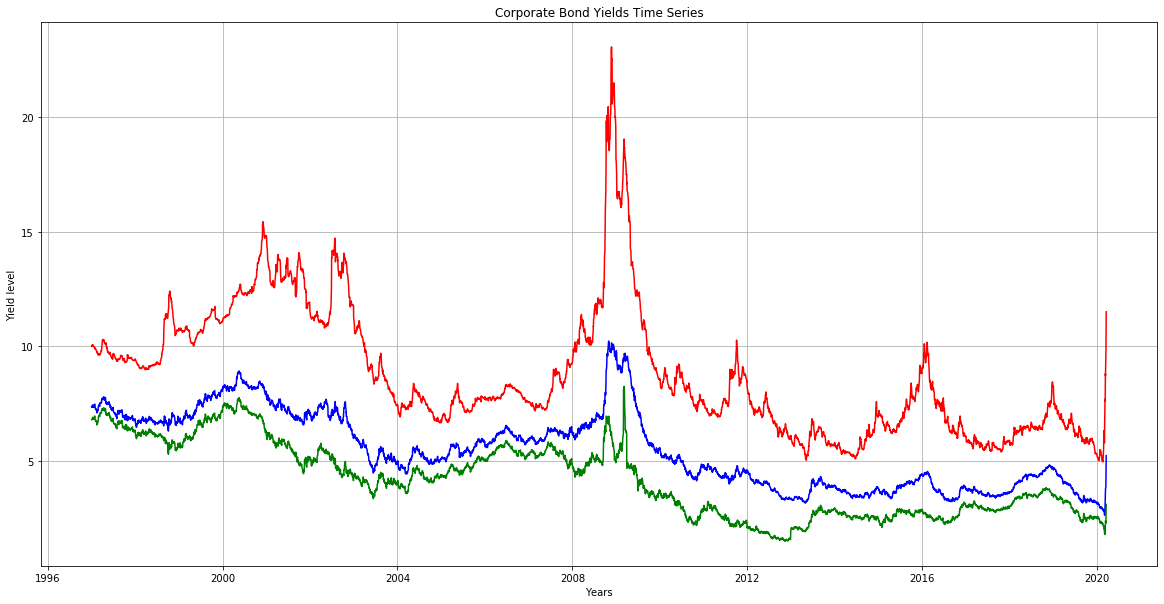

In [9]:
# Plotting the raw data 
fig = plt.figure(figsize = (20,10))

plt.plot(corp_tsy_df['Date'],corp_tsy_df['AAA Rating'],'-g')
plt.plot(corp_tsy_df['Date'],corp_tsy_df['BBB Rating'],'-b')
plt.plot(corp_tsy_df['Date'],corp_tsy_df['B Rating'],'-r')

# Chart properties
plt.title('Corporate Bond Yields Time Series')
plt.ylabel('Yield level')
plt.xlabel('Years')
plt.grid(True)
plt.show()

In [15]:
# DataFrame with spreads from the 5Y treasury
spread_corp_df = pd.DataFrame({'Date':corp_tsy_df['Date'],
                               'aaa': corp_tsy_df['AAA Rating'],
                               'bbb': corp_tsy_df['BBB Rating'],
                               'b': corp_tsy_df['B Rating'],
                               '2 Year':corp_tsy_df['2 Year'],
                                '5 Year': corp_tsy_df['5 Year'],
                                '10 Year': corp_tsy_df['10 Year'],
                                '20 Year': corp_tsy_df['20 Year'],
                                'AAA-5Y': corp_tsy_df['AAA Rating'] - corp_tsy_df['5 Year'],
                               'BBB-5Y': corp_tsy_df['BBB Rating'] - corp_tsy_df['5 Year'],
                               'B-5Y': corp_tsy_df['B Rating'] - corp_tsy_df['5 Year']
                               })

spread_corp_df



# Calculating my returns on spreads
0_return = []

start_price = 744.7

for index, row in sp500_settle_price_df.iterrows():
    close_row = row['Closing Price']
    
    # Calculation of returns
    daily_return = (close_row - start_price)/start_price*100  
    sp500_return.append(round(daily_return,2))
    start_price = close_row


,Date,aaa,bbb,b,2 Year,5 Year,10 Year,20 Year,AAA-5Y,BBB-5Y,B-5Y
1,1997-01-02,6.80,7.36,10.00,5.97,6.30,6.54,6.85,0.50,1.06,3.70
2,1997-01-03,6.80,7.34,10.01,5.95,6.28,6.52,6.84,0.52,1.06,3.73
3,1997-01-06,6.80,7.37,10.05,5.97,6.30,6.54,6.86,0.50,1.07,3.75
4,1997-01-07,6.82,7.39,10.07,5.98,6.32,6.57,6.89,0.50,1.07,3.75
5,1997-01-08,6.84,7.41,10.07,6.01,6.34,6.60,6.92,0.50,1.07,3.73
...,...,...,...,...,...,...,...,...,...,...,...
6054,2020-03-13,2.39,3.77,8.72,0.49,0.70,0.94,1.31,1.69,3.07,8.02
6055,2020-03-16,2.28,3.86,9.76,0.36,0.49,0.73,1.10,1.79,3.37,9.27
6056,2020-03-17,2.58,4.27,9.98,0.47,0.66,1.02,1.45,1.92,3.61,9.32
6057,2020-03-18,2.96,4.82,10.86,0.54,0.79,1.18,1.60,2.17,4.03,10.07


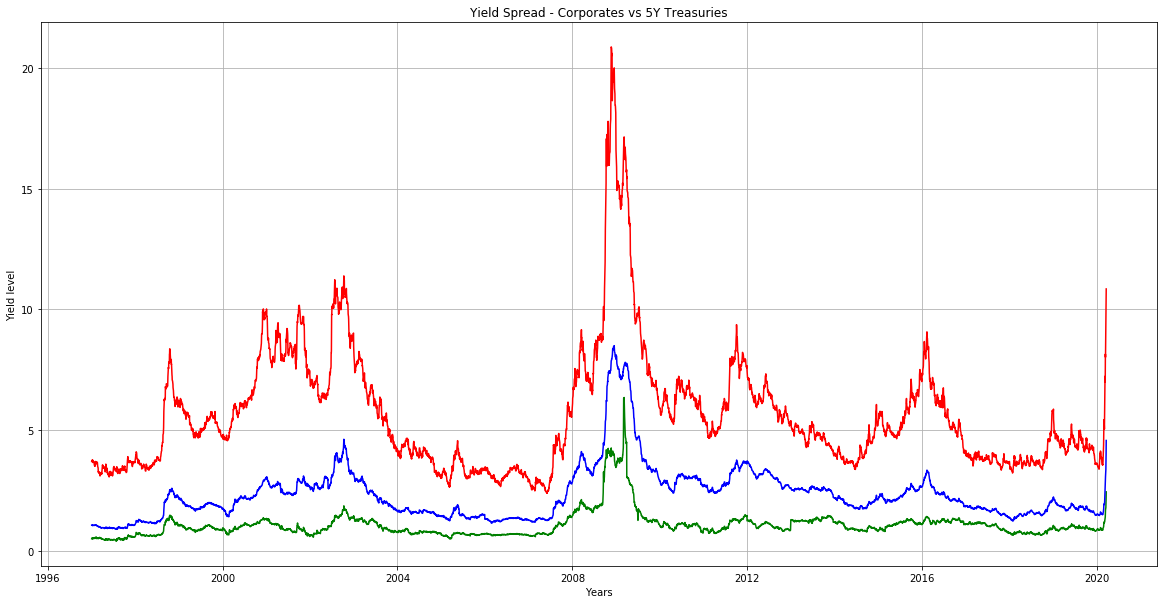

In [11]:
# Plotting spreads to 5Y
fig = plt.figure(figsize = (20,10))

plt.plot(spread_corp_df['Date'],spread_corp_df['AAA-5Y'],'-g')
plt.plot(spread_corp_df['Date'],spread_corp_df['BBB-5Y'],'-b')
plt.plot(spread_corp_df['Date'],spread_corp_df['B-5Y'],'-r')

# Chart properties
plt.title('Yield Spread - Corporates vs 5Y Treasuries')
plt.ylabel('Yield level')
plt.xlabel('Years')
plt.grid(True)
plt.show()

In [62]:
# Bridging in S&P 500 price data and calculating daily returns

sp500_price_data = 'S&P_500_1M_Futures.csv'

sp500_1m_df = pd.read_csv(sp500_price_data)

# Subset dataframe
sp500_settle_price_df = pd.DataFrame({'Date':sp500_1m_df['Date'],
                                      'Closing Price':sp500_1m_df['Settle']})

# Ordering by dates and converting dates
sp500_settle_price_df = sp500_settle_price_df.sort_index(axis=0,ascending=False)
sp500_settle_price_df['Date'] = pd.to_datetime(sp500_settle_price_df['Date'])

# Sorting by date 
sp500_settle_price_df = sp500_settle_price_df.loc[(sp500_settle_price_df['Date']>="1997-01-02")]
sp500_settle_price_df

# Calculating S&P500 returns
sp500_return = []

start_price = 744.7

for index, row in sp500_settle_price_df.iterrows():
    close_row = row['Closing Price']
    
    # Calculation of returns
    daily_return = (close_row - start_price)/start_price*100  
    sp500_return.append(round(daily_return,2))
    start_price = close_row

# Inserting the returns to the main s&P500 returns 
sp500_settle_price_df.insert(2,"S&P500 - Daily Returns",sp500_return)
sp500_settle_price_df

,Date,Closing Price,S&P500 - Daily Returns
5827,1997-01-02,744.70,0.00
5826,1997-01-03,757.20,1.68
5825,1997-01-06,750.70,-0.86
5824,1997-01-07,759.65,1.19
5823,1997-01-08,755.50,-0.55
...,...,...,...
4,2020-03-13,2695.90,9.19
3,2020-03-16,2416.20,-10.38
2,2020-03-17,2495.50,3.28
1,2020-03-18,2414.00,-3.27


In [30]:
# Creating subsets dataframe for spreads

# LTCM Failure
ltcm_df = spread_corp_df.loc[(spread_corp_df['Date']>='1997-08-01') & (spread_corp_df['Date']<='1999-08-01')]
ltcm_df

# S&P500
ltcm_sp500 = sp500_settle_price_df.loc[(sp500_settle_price_df['Date']>='1997-08-01') & (sp500_settle_price_df['Date']<='1999-08-01')]
ltcm_sp500


,Date,Closing Price
5680,1997-08-01,953.00
5679,1997-08-04,955.40
5678,1997-08-05,956.50
5677,1997-08-06,963.60
5676,1997-08-07,956.25
...,...,...
5182,1999-07-26,1354.80
5181,1999-07-27,1363.70
5180,1999-07-28,1367.70
5179,1999-07-29,1349.80


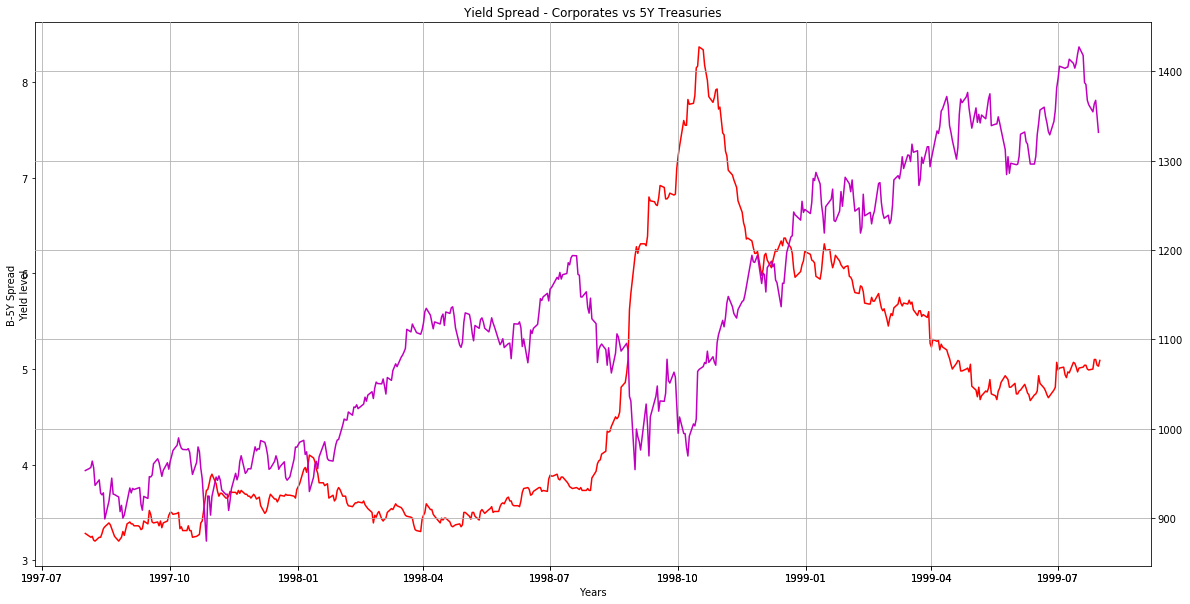

In [42]:
# LTCM Chart

fig1 = plt.figure(figsize = (20,10))

# ax1 = fig1.add_subplot(111)
# line1 = ax1.plot(ltcm_df['Date'],ltcm_df['AAA-5Y'],'-g')
# plt.ylabel("AAA-5Y Spread")

# ax2 = fig1.add_subplot(111)
# line2 = ax2.plot(ltcm_df['Date'],ltcm_df['BBB-5Y'],'-b')
# plt.ylabel("BBB-5Y Spread")

ax3 = fig1.add_subplot(111)
line3 = ax3.plot(ltcm_df['Date'],ltcm_df['B-5Y'],'-r')
plt.ylabel("B-5Y Spread")

ax4 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4 = ax4.plot(ltcm_sp500['Date'],ltcm_sp500['Closing Price'],'-m')
ax4.yaxis.tick_right()
plt.ylabel('S&P500 Price')


#plt.plot(ltcm_df['Date'],ltcm_df['AAA-5Y'],'-g')
#plt.plot(ltcm_df['Date'],ltcm_df['BBB-5Y'],'-b')
#plt.plot(ltcm_df['Date'],ltcm_df['B-5Y'],'-r')

# Chart properties
plt.title('Yield Spread - Corporates vs 5Y Treasuries')
plt.ylabel('Yield level')
plt.xlabel('Years')
plt.grid(True)
plt.show()

In [63]:
# Calculating returns on S&P500
ltcm_sp500





,Date,Closing Price
5680,1997-08-01,953.00
5679,1997-08-04,955.40
5678,1997-08-05,956.50
5677,1997-08-06,963.60
5676,1997-08-07,956.25
...,...,...
5182,1999-07-26,1354.80
5181,1999-07-27,1363.70
5180,1999-07-28,1367.70
5179,1999-07-29,1349.80
